In [1]:
import Pkg; Pkg.activate("../scripts")
Pkg.instantiate()
using Revise
using PlutoUI
using TMI
using Test
using PythonCall
using CondaPkg
using PythonPlot
const sns = pyimport("seaborn")

const cartopy = pyimport("cartopy")
const matplotlib = pyimport("matplotlib")

ccrs = cartopy.crs

import Pkg;
using Interpolations
using Statistics
using LinearAlgebra
plotsdir(x) = "/Users/anthonymeza/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Documents/GitHub/TMI.jl/plots/" * x
include("../src/sample_observations.jl")

using NaNStatistics

const mpl = pyimport("matplotlib")
mpl.rcParams["figure.dpi"] = 200



  Activating project at `~/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/Documents/GitHub/TMI.jl/scripts`


200

In [2]:
custom_style = Dict("text.color" => "black")

Dict{String, String} with 1 entry:
  "text.color" => "black"

In [3]:
sns.set_theme(context="notebook", style="ticks", palette = "colorblind", rc=custom_style)

Python: None

In [4]:
TMIversion = "modern_90x45x33_G14_v2";
A, Alu, γ, TMIfile, L, B = config_from_nc(TMIversion); println(sum(cellvolume(γ)))
volume = volumefilled(TMIversion,Alu,γ); println(maximum(volume))
volume = (10 .^ volume.tracer) .* cellarea(γ).tracer
volume = BoundaryCondition(volume,(γ.lon,γ.lat),γ.depth[1],3,1,γ.wet[:,:,1],:V,"volume filled by surface gridcell","unknown")
volume_mod = 1 * volume 
TMIfile = TMI.pkgdatadir("TMI_"*TMIversion*".nc")
θ̄_mod = readfield(TMIfile, "θ", γ); #true mean
θ̄_mod_MOT = mean(θ̄_mod); #true mean
θ̄_mod_SST = getsurfaceboundary(θ̄_mod);

A
  0.209672 seconds (399.10 k allocations: 60.992 MiB, 11.47% gc time)
Alu
  0.684676 seconds (402.31 k allocations: 502.508 MiB, 1.53% gc time)
L=
  0.163332 seconds (475.80 k allocations: 31.653 MiB)
B=
  0.049783 seconds (32.42 k allocations: 2.129 MiB)
1.4442375457929354e18
6.611162189504795


In [5]:
TMIversion = "LGM_90x45x33_G14";
A, Alu, γ, TMIfile, L, B = config_from_nc(TMIversion); println(sum(cellvolume(γ))) 
volume = volumefilled(TMIversion,Alu,γ)
volume = (10 .^ volume.tracer) .* cellarea(γ).tracer
volume = BoundaryCondition(volume,(γ.lon,γ.lat),γ.depth[1],3,1,γ.wet[:,:,1],:V,"volume filled by surface gridcell","unknown")
volume_LGM = 1. * volume
TMIfile = TMI.pkgdatadir("TMI_"*TMIversion*".nc")
θ̄_LGM = readfield(TMIfile, "θ", γ); #true mean
θ̄_LGM_MOT = mean(θ̄_LGM); #true mean
θ̄_LGM_SST = getsurfaceboundary(θ̄_LGM);

A
  0.018649 seconds (3.45 k allocations: 34.589 MiB)
Alu
  0.536164 seconds (81 allocations: 476.181 MiB, 3.18% gc time)
L=
  0.002198 seconds (373 allocations: 38.508 KiB)
B=
  0.001379 seconds (374 allocations: 38.531 KiB)
1.4442375457929354e18


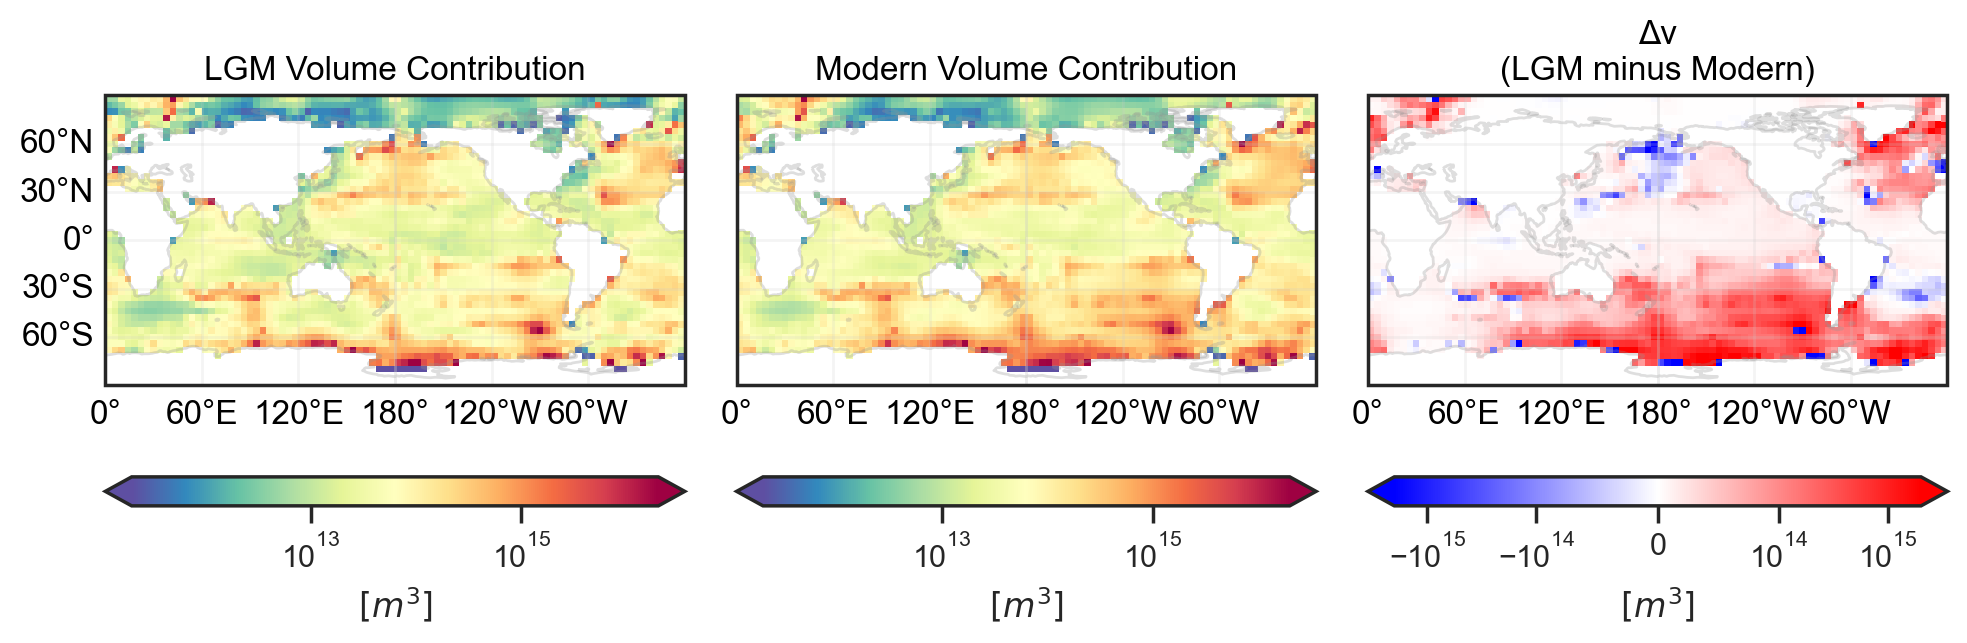

Python: None

In [6]:

figl, ax = subplots(1, 3, figsize = (10, 10), 
						subplot_kw=Dict("projection"=> ccrs.PlateCarree(central_longitude = 180)))

labels = ["LGM Volume Contribution", "Modern Volume Contribution", "Δv\n(LGM minus Modern)"] 
volumes = [volume_LGM.tracer, volume_mod.tracer, 1 * (volume_mod.tracer .- volume_LGM.tracer)]
vnorms = [matplotlib.colors.LogNorm(vmin = 2e11, vmax=2e16), 
matplotlib.colors.LogNorm(vmin = 2e11, vmax=2e16), matplotlib.colors.SymLogNorm(linthresh =1e14, vmin = -2e15, vmax=2e15)]

vnorm = vnorms[1]
cmaps = ["Spectral_r", "Spectral_r", "bwr"]

for (i, axl) in enumerate(ax)
    axl.set_title(labels[i])
    axl.coastlines(color = "#949494", alpha = 0.3)
    cml = axl.pcolormesh(γ.lon, γ.lat, volumes[i]', cmap = cmaps[i], transform = ccrs.PlateCarree(),norm=vnorms[i])
    cb = figl.colorbar(cml, orientation = "horizontal", 
    extend = "both", label = L"[m^3]", fraction = 0.03, pad = 0.05)
    gl = axl.gridlines(alpha = 0.2, draw_labels = true)
    gl.top_labels = false
    gl.right_labels = false
    if i > 1
        gl.left_labels = false
    end
end
figl.tight_layout()
figl.savefig(plotsdir("Volume_Differences.png"), dpi = 200, bbox_inches = "tight")

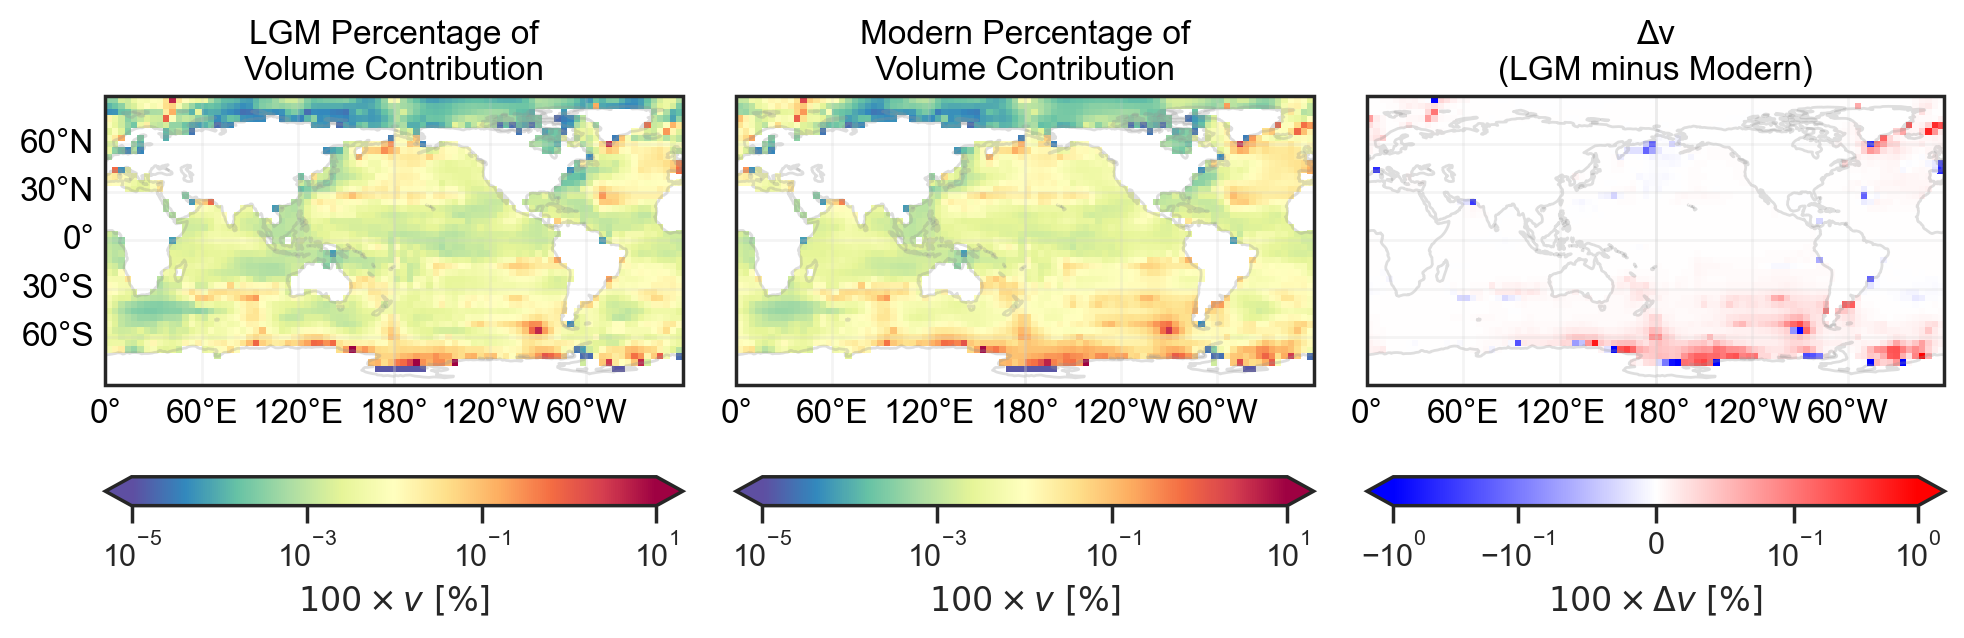

Python: None

In [7]:

figl, ax = subplots(1, 3, figsize = (10, 10), 
						subplot_kw=Dict("projection"=> ccrs.PlateCarree(central_longitude = 180)))

labels = ["LGM Percentage of\nVolume Contribution", "Modern Percentage of\nVolume Contribution", "Δv\n(LGM minus Modern)"] 
volumes = 100 .* [volume_LGM.tracer, volume_mod.tracer, 1 * (volume_mod.tracer .- volume_LGM.tracer)] ./ sum(cellvolume(γ))
vnorms = [matplotlib.colors.LogNorm(vmin = 1e-5, vmax=1e1), 
matplotlib.colors.LogNorm(vmin =  1e-5, vmax=1e1), matplotlib.colors.SymLogNorm(linthresh =1e-1, vmin = -1, vmax=1)]

vnorm = vnorms[1]
cmaps = ["Spectral_r", "Spectral_r", "bwr"]

for (i, axl) in enumerate(ax)
    clabel = 
    axl.set_title(labels[i])
    axl.coastlines(color = "#949494", alpha = 0.3)
    cml = axl.pcolormesh(γ.lon, γ.lat, volumes[i]', cmap = cmaps[i], transform = ccrs.PlateCarree(),norm=vnorms[i])
    if i < 3
        cb = figl.colorbar(cml, orientation = "horizontal", 
        extend = "both", label = L"100 \times v \ [\%]", fraction = 0.03, pad = 0.05)
    else 
        cb = figl.colorbar(cml, orientation = "horizontal", 
        extend = "both", label = L"100 \times \Delta v \ [\%]", fraction = 0.03, pad = 0.05)
    end
    gl = axl.gridlines(alpha = 0.2, draw_labels = true)
        
    gl.top_labels = false
    gl.right_labels = false
    if i > 1
        gl.left_labels = false
    end
end
figl.tight_layout()
figl.savefig(plotsdir("Volume_Differences_Normalized.png"), dpi = 200, bbox_inches = "tight")

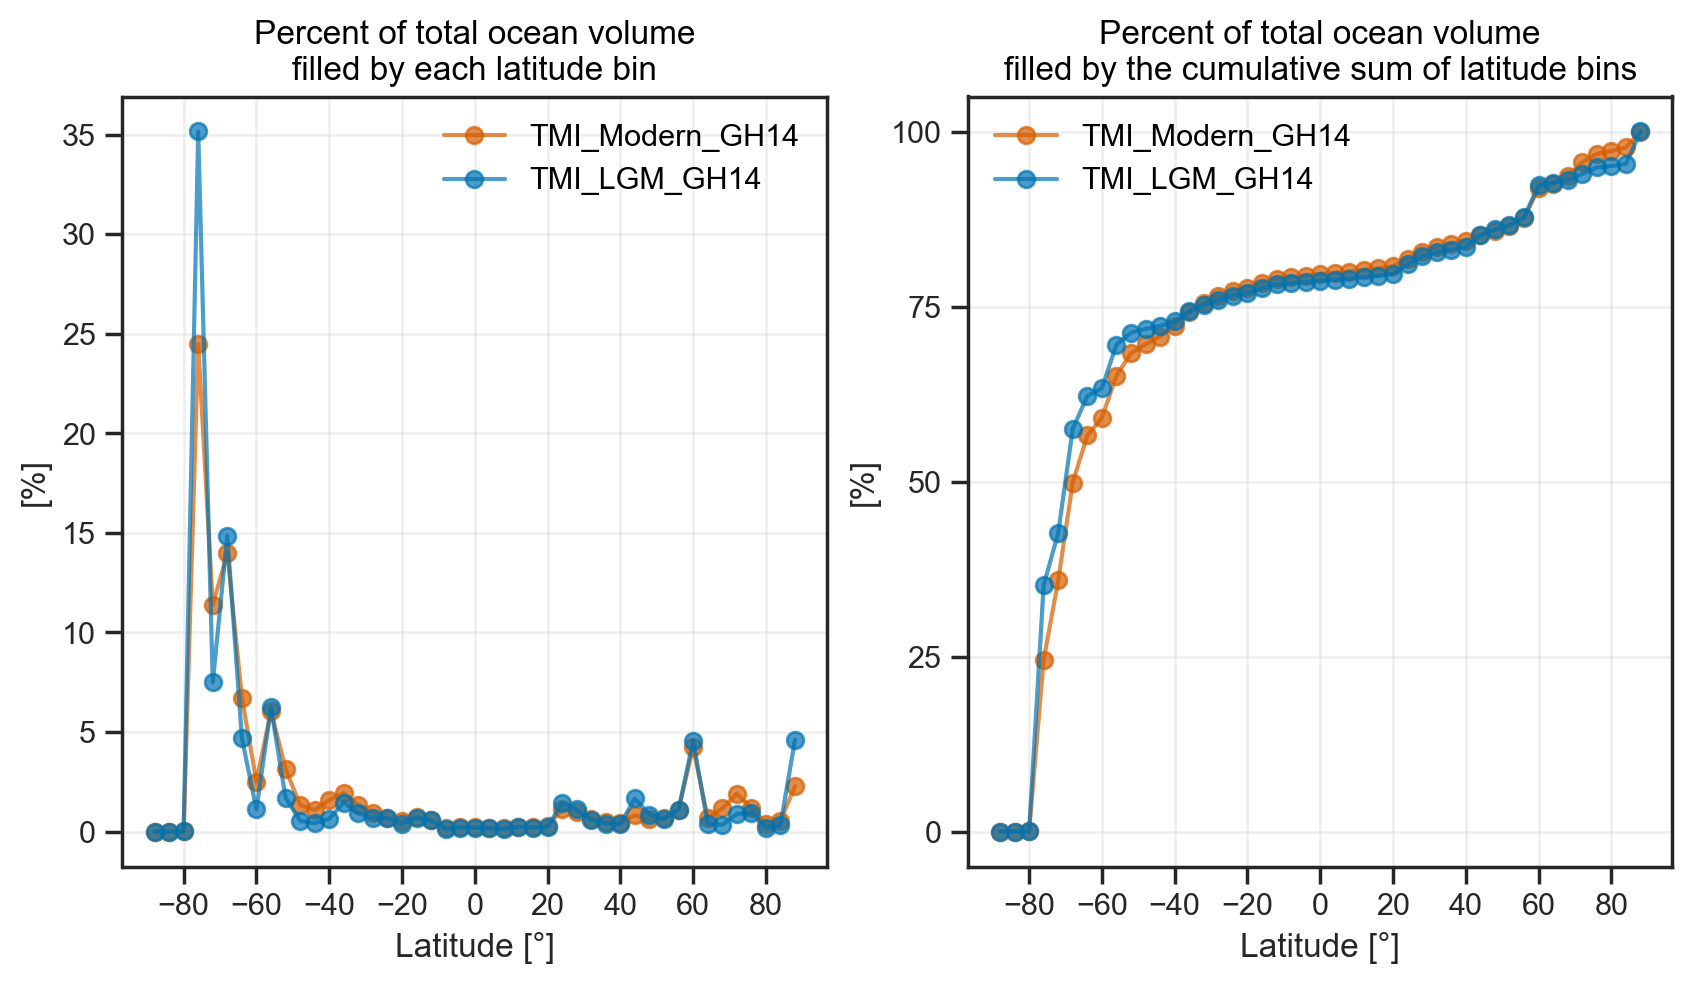

Python: None

In [8]:
fig, ax = subplots(1, 2, figsize = (10, 5)) 

lgm_lat_volumes = nansum(volumes[1], dims = 1)[:]
lgm_mod_volumes = nansum(volumes[2], dims = 1)[:]

ax[0].plot(γ.lat, lgm_mod_volumes, label = "TMI_Modern_GH14", marker='o', c = "r", alpha = 0.7)
ax[0].plot(γ.lat, lgm_lat_volumes, label = "TMI_LGM_GH14", marker='o', c = "b", alpha = 0.7)
# ax[0].plot(γ.lat, lgm_mod_volumes .- lgm_lat_volumes, label = "Modern minus LGM", marker='o', c = "k", alpha = 0.5)

ax[0].legend(frameon = false)

ax[1].plot(γ.lat, cumsum(lgm_mod_volumes), label = "TMI_Modern_GH14", marker='o', c = "r", alpha = 0.7)
ax[1].plot(γ.lat, cumsum(lgm_lat_volumes), label = "TMI_LGM_GH14", marker='o', c = "b", alpha = 0.7)
# ax[1].plot(γ.lat, cumsum(lgm_mod_volumes) .- cumsum(lgm_lat_volumes), label = "Modern minus LGM", marker='o', c = "k", alpha = 0.5)

ax[1].legend(frameon = false)

[a.set_xlabel("Latitude [°]") for a in ax]
[a.set_ylabel("[%]") for a in ax]

[a.set_xticks(collect(-80:20:80)) for a in ax]
ax[1].set_yticks([0, 25, 50, 75, 100])
ax[0].set_title("Percent of total ocean volume\nfilled by each latitude bin")
ax[1].set_title("Percent of total ocean volume\nfilled by the cumulative sum of latitude bins")
[a.grid(alpha = 0.3) for a in ax]
fig.savefig(plotsdir("Volume_Differences_Normalized_latitude.png"), dpi = 200, bbox_inches = "tight")

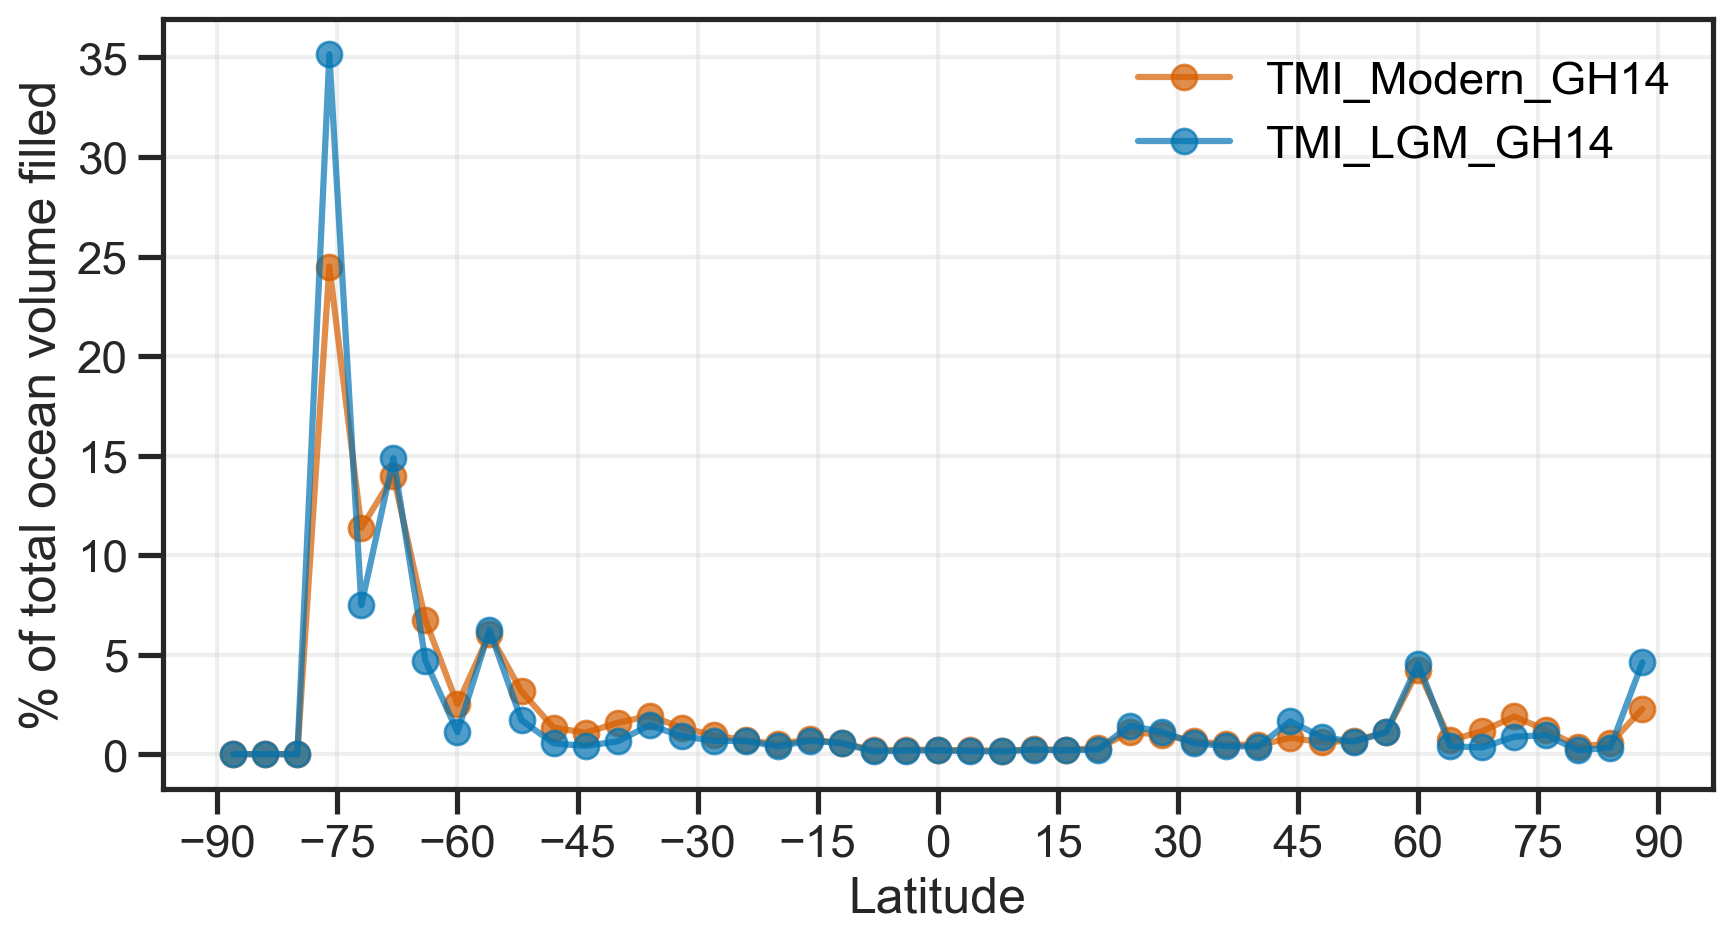

Python: None

In [90]:
sns.set_theme(context="talk", style="ticks", palette = "colorblind", rc=custom_style)
fig, ax = subplots(figsize = (10, 5)) 

lgm_lat_volumes = nansum(volumes[1], dims = 1)[:]
lgm_mod_volumes = nansum(volumes[2], dims = 1)[:]

ax.plot(γ.lat, lgm_mod_volumes, label = "TMI_Modern_GH14", marker='o', c = "r", alpha = 0.7)
ax.plot(γ.lat, lgm_lat_volumes, label = "TMI_LGM_GH14", marker='o', c = "b", alpha = 0.7)
# ax[1].plot(γ.lat, cumsum(lgm_mod_volumes) .- cumsum(lgm_lat_volumes), label = "Modern minus LGM", marker='o', c = "k", alpha = 0.5)

ax.legend(frameon = false)

ax.set_xlabel("Latitude")

ax.set_xticks(collect(-90:15:90)) 
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel("% of total ocean volume filled")
ax.grid(alpha = 0.3) 
fig.savefig(plotsdir("Volume_Differences_Normalized_latitude.png"), dpi = 200, bbox_inches = "tight")
sns.set_theme(context="notebook", style="ticks", palette = "colorblind", rc=custom_style)


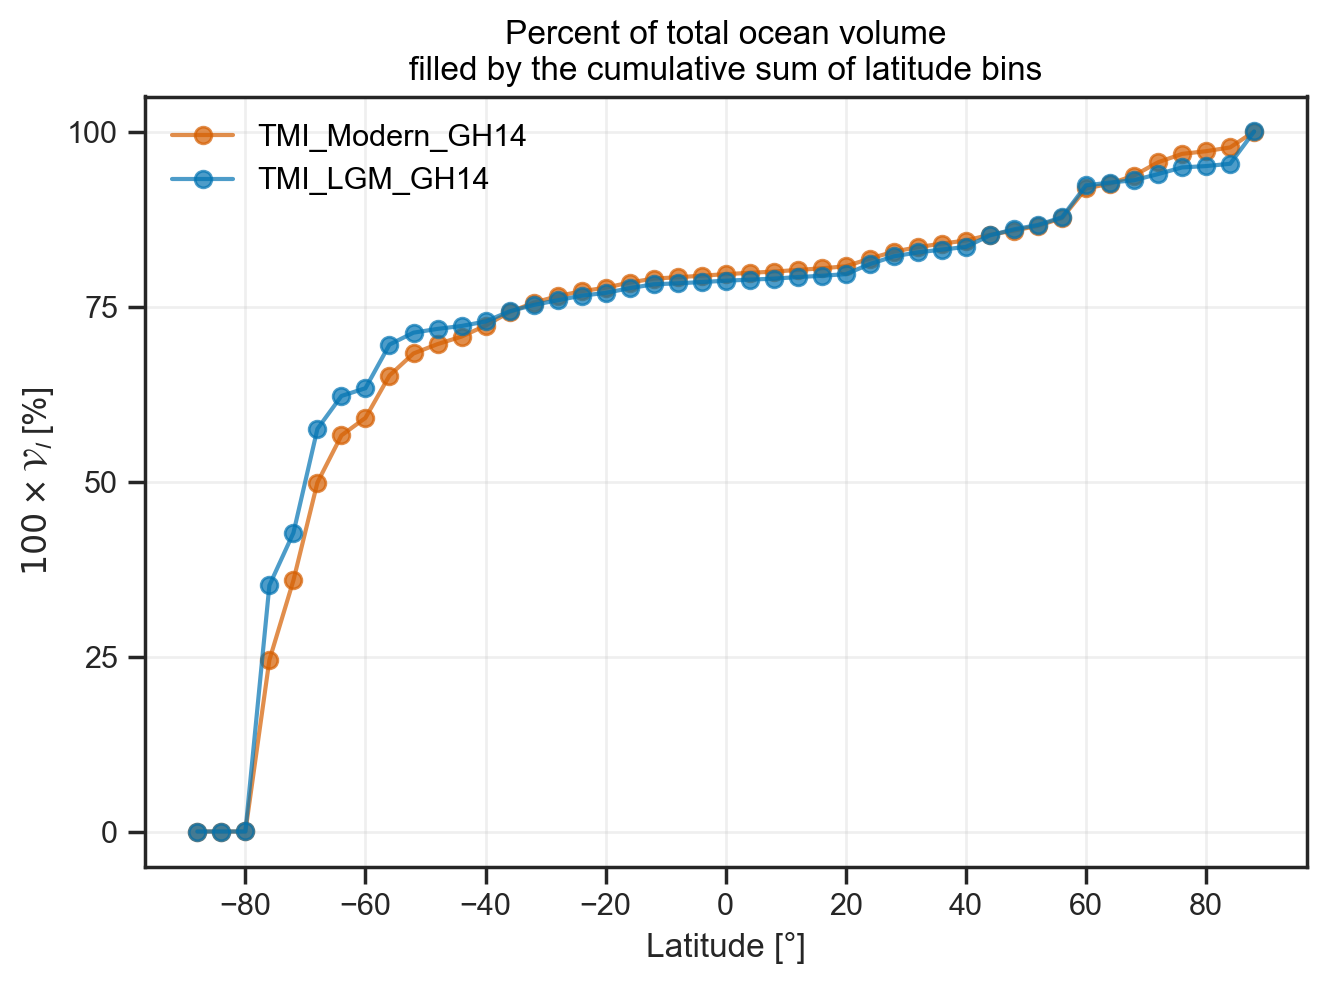

Python: None

In [91]:
fig, ax = subplots(figsize = (7.5, 5)) 

lgm_lat_volumes = nansum(volumes[1], dims = 1)[:]
lgm_mod_volumes = nansum(volumes[2], dims = 1)[:]

ax.plot(γ.lat, cumsum(lgm_mod_volumes), label = "TMI_Modern_GH14", marker='o', c = "r", alpha = 0.7)
ax.plot(γ.lat, cumsum(lgm_lat_volumes), label = "TMI_LGM_GH14", marker='o', c = "b", alpha = 0.7)
# ax[1].plot(γ.lat, cumsum(lgm_mod_volumes) .- cumsum(lgm_lat_volumes), label = "Modern minus LGM", marker='o', c = "k", alpha = 0.5)

ax.legend(frameon = false)

ax.set_xlabel("Latitude [°]")
ax.set_ylabel(L"100 \times \mathcal{V}_\mathcal{l}" *" [%]")

ax.set_xticks(collect(-80:20:80)) 
ax.set_yticks([0, 25, 50, 75, 100])
ax.set_title("Percent of total ocean volume\nfilled by each latitude bin")
ax.set_title("Percent of total ocean volume\nfilled by the cumulative sum of latitude bins")
ax.grid(alpha = 0.3) 
fig.savefig(plotsdir("Volume_Differences_Normalized_latitude_bins.png"), dpi = 200, bbox_inches = "tight")

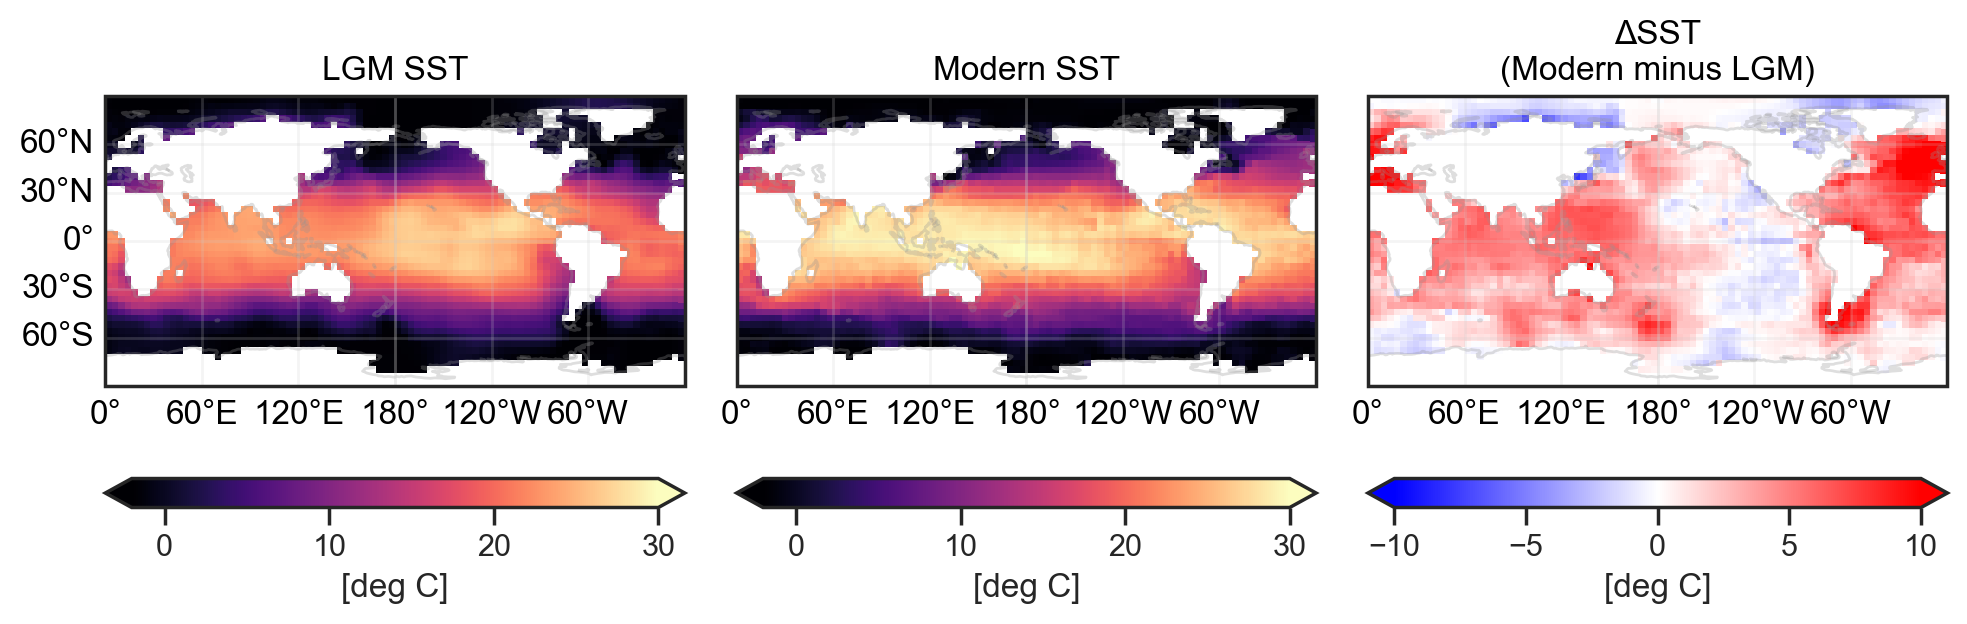

Python: None

In [92]:
figl, ax = subplots(1, 3, figsize = (10, 10), 
						subplot_kw=Dict("projection"=> ccrs.PlateCarree(central_longitude = 180)))

labels = ["LGM SST", "Modern SST", "ΔSST\n(Modern minus LGM)"] 

temperatures = [θ̄_LGM_SST.tracer, θ̄_mod_SST.tracer, 1 * (θ̄_mod_SST.tracer .- θ̄_LGM_SST.tracer)]
vnorms = [matplotlib.colors.Normalize(vmin = -2, vmax=30), 
matplotlib.colors.Normalize(vmin = -2, vmax=30), matplotlib.colors.Normalize(vmin = -10, vmax=10)]
cmaps = ["magma", "magma", "bwr"]
for (i, axl) in enumerate(ax)
    axl.set_title(labels[i])
    axl.coastlines(color = "#949494", alpha = 0.3)
    cml = axl.pcolormesh(γ.lon, γ.lat, temperatures[i]', 
    cmap = cmaps[i], 
    transform = ccrs.PlateCarree(),norm=vnorms[i])
    cb = figl.colorbar(cml, orientation = "horizontal", extend = "both", label = "[deg C]", fraction = 0.03, pad = 0.05)
    gl = axl.gridlines(alpha = 0.2, draw_labels = true)
    gl.top_labels = false
    gl.right_labels = false
    if i > 1
        gl.left_labels = false
    end
end
figl.tight_layout()
figl.savefig(plotsdir("SST_Differences.png"), dpi = 200, bbox_inches = "tight")

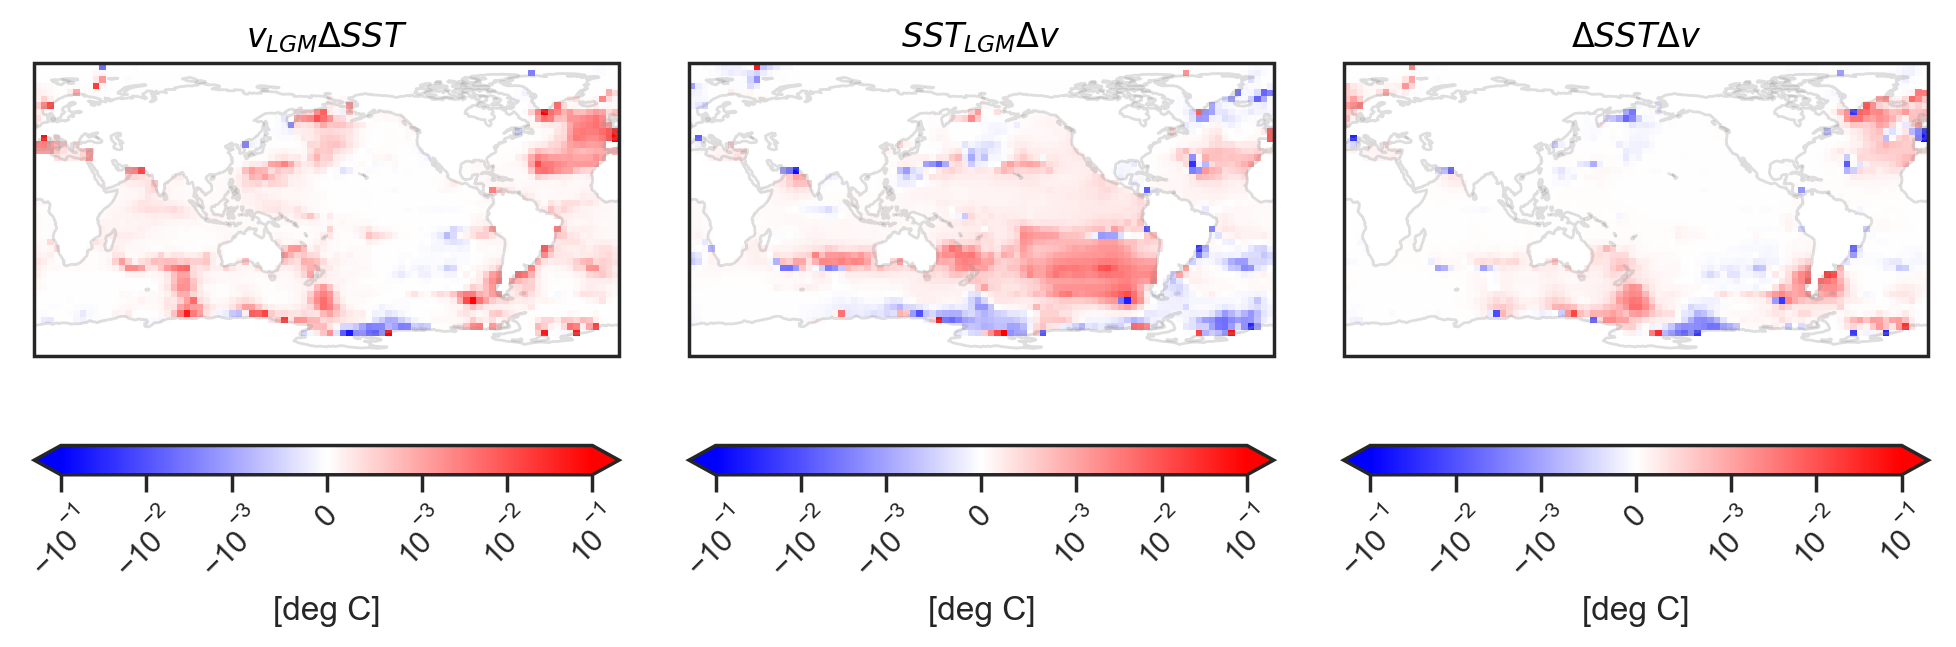

Python: None

In [94]:
figl, ax = subplots(1, 3, figsize = (10, 10), 
						subplot_kw=Dict("projection"=> ccrs.PlateCarree(central_longitude = 180)))

labels = [L"v_{LGM} \Delta SST", L"SST_{LGM} \Delta v", L"\Delta SST \Delta v"] 

ΔSST = θ̄_mod_SST.tracer .- θ̄_LGM_SST.tracer
Δv = (volume_mod.tracer .- volume_LGM.tracer) ./ sum(cellvolume(γ))

temperatures = [ΔSST .* volume_LGM.tracer ./ sum(cellvolume(γ)) , Δv .* θ̄_LGM_SST.tracer, ΔSST .* Δv]
vnorms = [ matplotlib.colors.SymLogNorm(linthresh =1e-3, vmin = -1e-1, vmax=1e-1), 
 matplotlib.colors.SymLogNorm(linthresh =1e-3, vmin = -1e-1, vmax=1e-1), 
    matplotlib.colors.SymLogNorm(linthresh =1e-3, vmin = -1e-1, vmax=1e-1)]

cmaps = ["bwr", "bwr", "bwr"]
for (i, axl) in enumerate(ax)
    axl.set_title(labels[i])
    axl.coastlines(color = "#949494", alpha = 0.3)
    cml = axl.pcolormesh(γ.lon, γ.lat, temperatures[i]', 
    cmap = cmaps[i], 
    transform = ccrs.PlateCarree(),norm=vnorms[i])
    cb = figl.colorbar(cml, orientation = "horizontal", extend = "both", label = "[deg C]", fraction = 0.03, pad = 0.05)
    cb.ax.tick_params(rotation=45)
end
figl.tight_layout()
figl.savefig(plotsdir("MOT_decomp_Differences.png"), dpi = 200, bbox_inches = "tight")

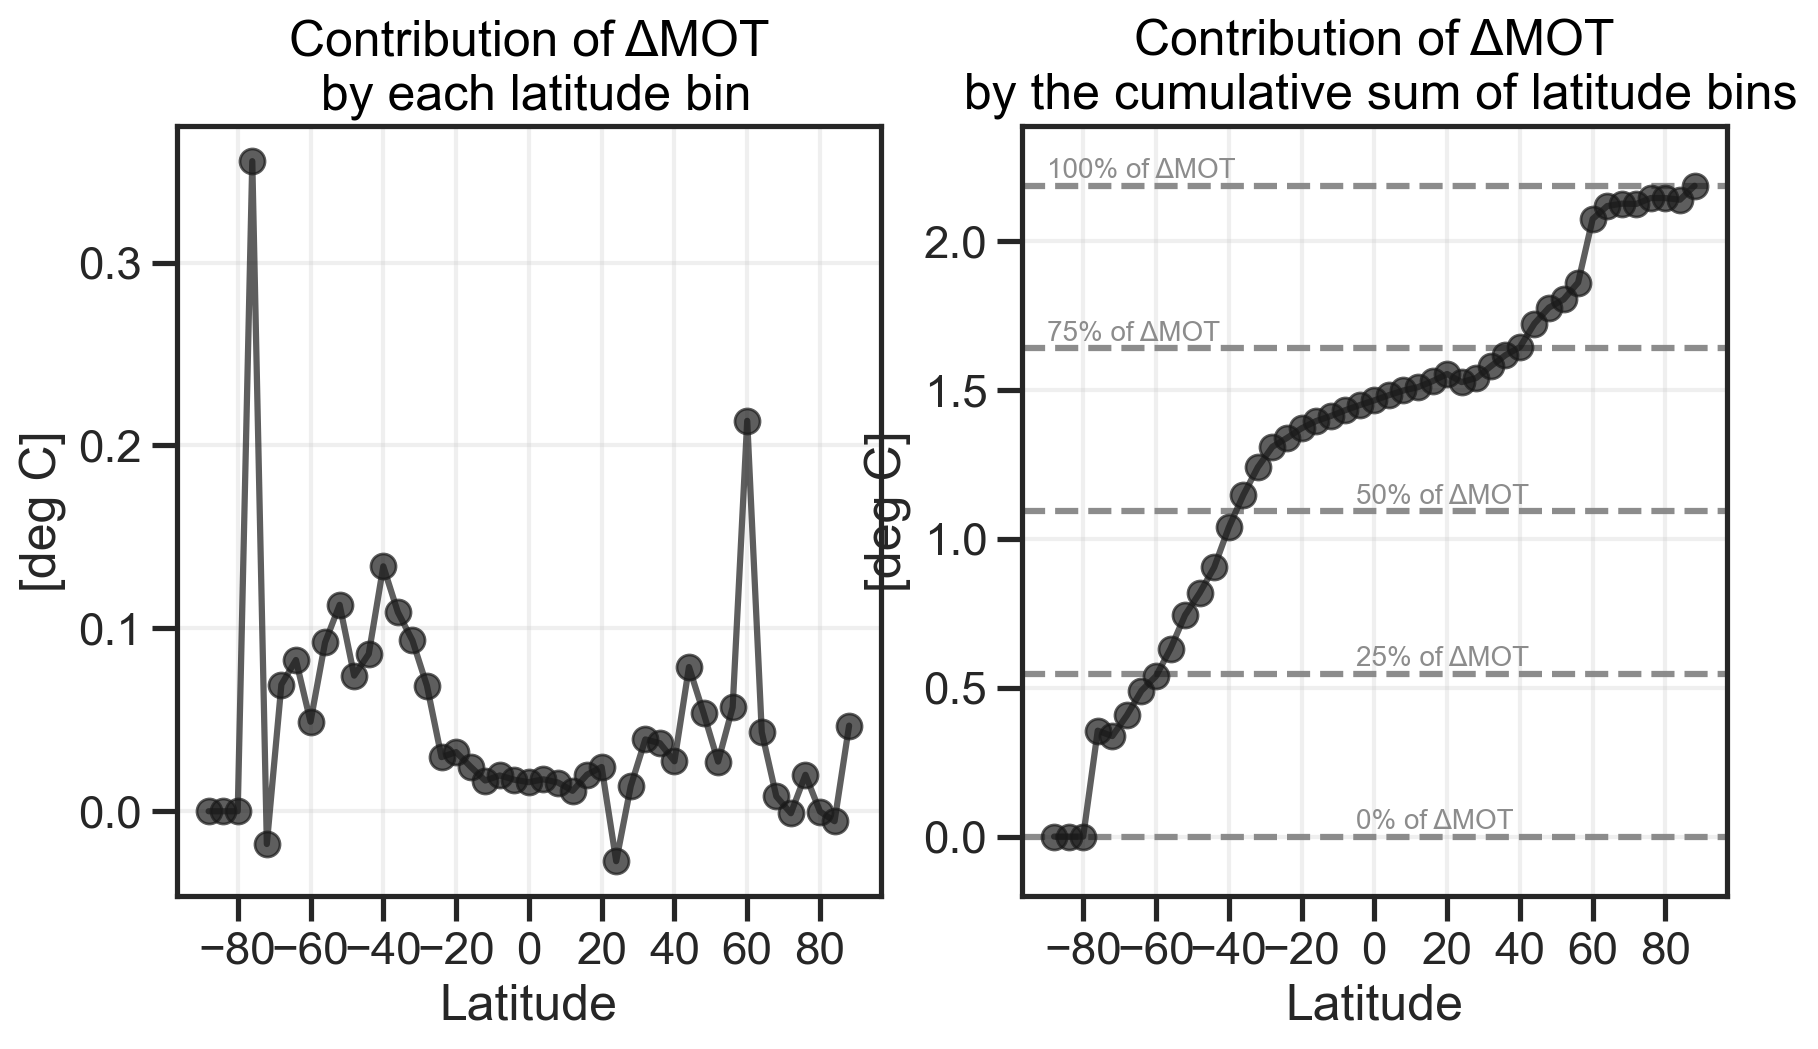

Python: None

In [39]:
fig, ax = subplots(1, 2, figsize = (10, 5)) 
volume_temp_cont = nansum.(temperatures, dims = 1)

percentages = [0, 25, 50, 75, 100]
final_value = cumsum(sum(volume_temp_cont)[:])[end]
percentage_values = [final_value * p / 100 for p in percentages]

xlocs = [-5, -5, -5, -90, -90]
for (i, p) in enumerate(percentages)
    val = percentage_values[i]
    # Find the index closest to the percentage value in the cumulative sum
    ax[1].axhline(y=val, color="gray", linestyle="--", alpha = 0.9)
    ax[1].text(xlocs[i], val + 0.05, string(p) * "% of ΔMOT", fontsize=10, va="center", ha="left", color = "grey", alpha = 0.9)
end

ax[0].plot(γ.lat, sum(volume_temp_cont)[:], marker='o', c = "k", alpha = 0.7)
ax[1].plot(γ.lat, cumsum(sum(volume_temp_cont)[:]), marker='o', c = "k", alpha = 0.7)

[a.set_xticks(collect(-80:20:80)) for a in ax]

[a.set_xlabel("Latitude") for a in ax]
[a.set_ylabel("[deg C]") for a in ax]

ax[0].set_title("Contribution of ΔMOT\n by each latitude bin")
ax[1].set_title("Contribution of ΔMOT\n by the cumulative sum of latitude bins")
[a.grid(alpha = 0.3) for a in ax]
ax[1].set_ylim(-0.2, final_value + 0.2)
fig.savefig(plotsdir("Temperature_Differences_Normalized_latitude.png"), dpi = 200, bbox_inches = "tight")

BoundaryCondition{Float64, Float64, 2, Int64, Matrix{Float64}}
Field size (90, 45)
                                 cell area                                  
      ┌────────────────────────────────────────────────────────────┐ 2e¹¹   
   45 │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ ┌──┐   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ m²
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│   
      │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


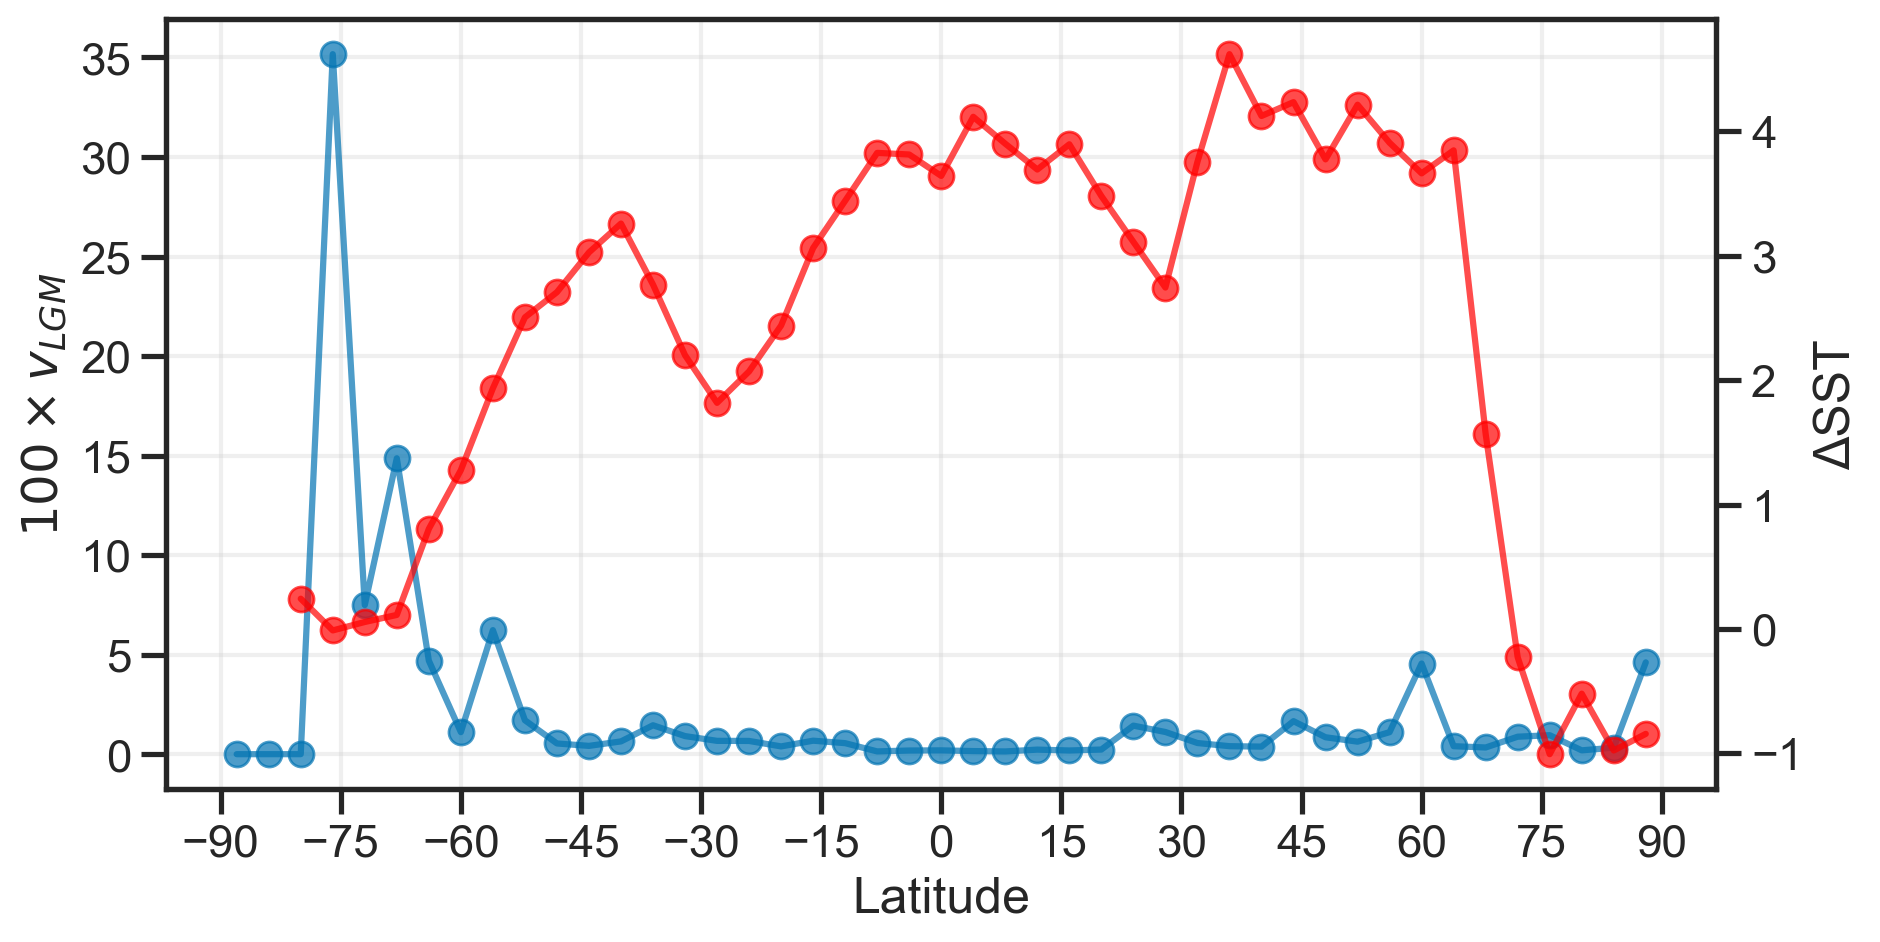

Python: None

In [89]:
sns.set_theme(context="talk", style="ticks", palette = "colorblind", rc=custom_style)
fig, ax = subplots(figsize = (10, 5)) 

lgm_lat_volumes = nansum(volumes[1], dims = 1)[:]
ΔSST_lat =  1 * (θ̄_mod_SST.tracer .- θ̄_LGM_SST.tracer); ΔSST_lat[isnan.(ΔSST_lat)] .= 0; 
ΔSST_lat = sum(ΔSST_lat .* cellarea(γ).tracer, dims = 1) ./ sum(cellarea(γ).tracer, dims = 1)
ΔSST_lat = ΔSST_lat[:]

ax.plot(γ.lat, lgm_lat_volumes, marker='o', c = "b", alpha = 0.7)
ax2 = ax.twinx()
ax2.plot(γ.lat, ΔSST_lat, marker='o', c = "red", alpha = 0.7)

# ax[1].plot(γ.lat, cumsum(lgm_mod_volumes) .- cumsum(lgm_lat_volumes), label = "Modern minus LGM", marker='o', c = "k", alpha = 0.5)

ax.legend(frameon = false)
ax2.legend(frameon = false)

ax.set_xlabel("Latitude")
ax.set_ylabel("% of total ocean volume filled")
ax2.set_ylabel("ΔSST")

ax.set_xticks(collect(-90:15:90)) 
# ax.set_yticks([0, 25, 50, 75, 100])
ax.set_ylabel(L"100 \times v_{LGM}")
ax.grid(alpha = 0.3) 
fig.savefig(plotsdir("Volume_Differences_Normalized_latitude.png"), dpi = 200, bbox_inches = "tight")

2.1846621210889836

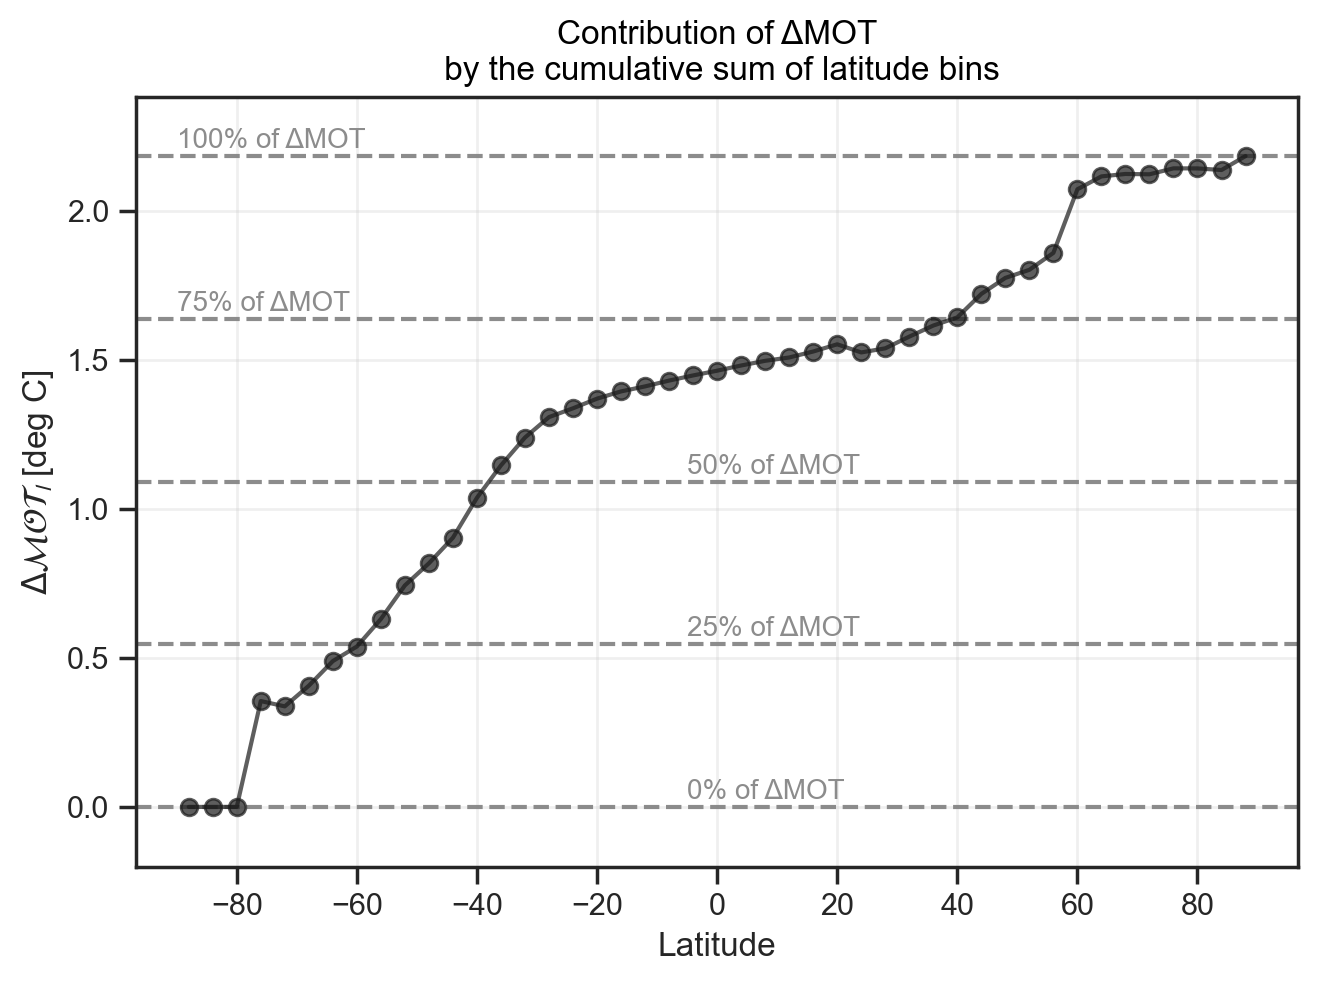

Python: None

In [247]:
fig, ax = subplots(figsize = (7.5, 5)) 
volume_temp_cont = nansum.(temperatures, dims = 1)

percentages = [0, 25, 50, 75, 100]
print(final_value)
final_value = cumsum(sum(volume_temp_cont)[:])[end]
percentage_values = [final_value * p / 100 for p in percentages]

xlocs = [-5, -5, -5, -90, -90]
for (i, p) in enumerate(percentages)
    val = percentage_values[i]
    # Find the index closest to the percentage value in the cumulative sum
    ax.axhline(y=val, color="gray", linestyle="--", alpha = 0.9)
    ax.text(xlocs[i], val + 0.05, string(p) * "% of ΔMOT", fontsize=10, va="center", ha="left", color = "grey", alpha = 0.9)
end

ax.plot(γ.lat, cumsum(sum(volume_temp_cont)[:]), marker='o', c = "k", alpha = 0.7)

ax.set_xticks(collect(-80:20:80))
ax.set_ylabel(L"\Delta \mathcal{MOT}_\mathcal{l}" *" [deg C]")

ax.set_xlabel("Latitude")

ax.set_title("Contribution of ΔMOT\n by the cumulative sum of latitude bins")
ax.grid(alpha = 0.3)
ax.set_ylim(-0.2, final_value + 0.2)
fig.savefig(plotsdir("Temperature_Differences_Normalized_latitude.png"), dpi = 200, bbox_inches = "tight")

2.1846621210889827
1.5389253262836307
0.5841529404404849
0.061583854364867026


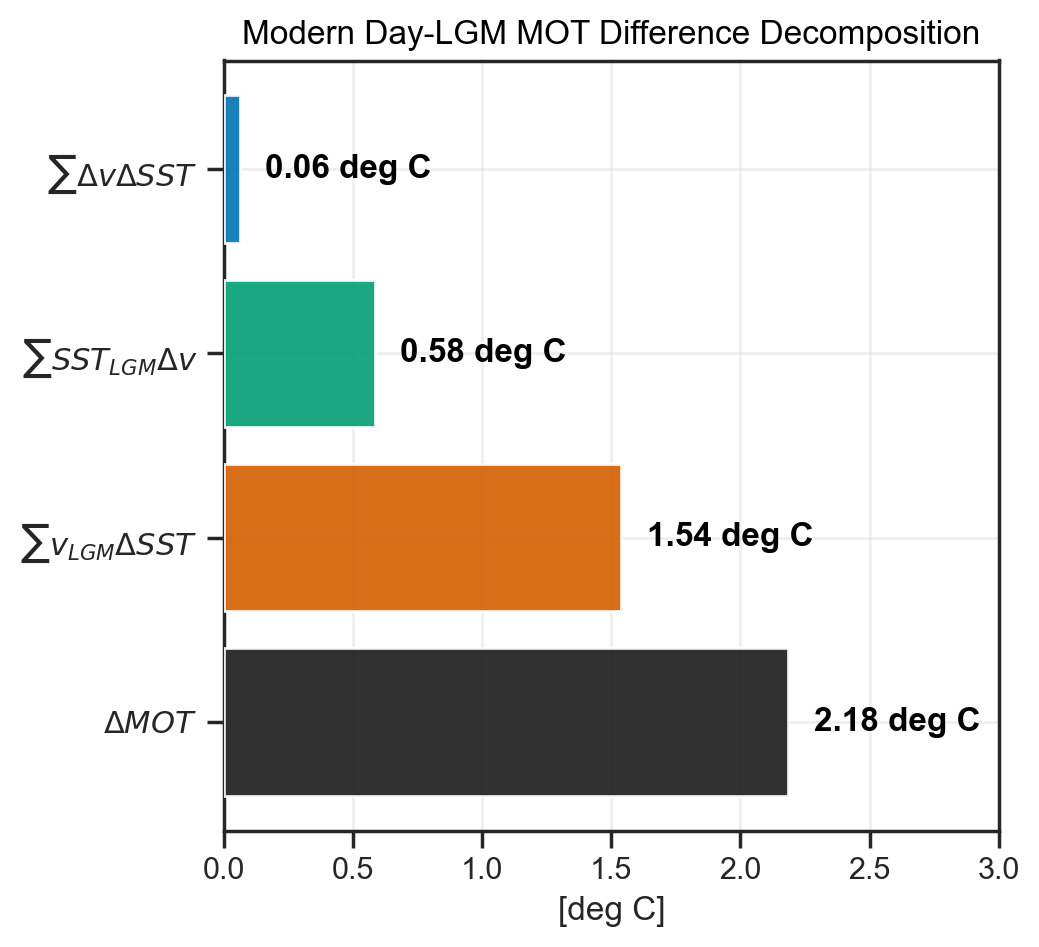

Python: None

In [248]:
fig, ax = subplots(figsize = (5, 5))
ax.grid(alpha = 0.3, zorder = 0)

groups = [L"\Delta MOT", L"\sum v_{LGM} \Delta SST", L"\sum SST_{LGM} \Delta v", L"\sum \Delta v\Delta SST"]

WΔθ, θΔW, ΔWΔθ = nansum.(temperatures)
vals = [WΔθ + θΔW + ΔWΔθ, WΔθ, θΔW, ΔWΔθ]

bars = ax.barh(1:4, vals, color = reverse(["b", "g", "r", "k"]), alpha = 0.9, zorder = 10)
ax.set_xlabel("[deg C]")
ax.set_title("Modern Day-LGM MOT Difference Decomposition")


# Label values at the end of each bar
for bar in bars
    width = bar.get_width()
    yval_r = round(pyconvert(Float32, width), digits = 2)

    println(width)
    ax.text(width + .1, bar.get_y() + bar.get_height()/2, string(yval_r) * " deg C", 
             va="center", color="black", fontweight = "bold")
end
fig
    
# Customize plot
ax.set_xlim(0, 3)
ax.set_yticks(1:4)
ax.set_yticklabels(groups)
fig.savefig(plotsdir("MOT_Change_decomposition_horizontal.png"), dpi = 200, bbox_inches = "tight")

LoadError: ArgumentError: Package matplotlib not found in current path.
- Run `import Pkg; Pkg.add("matplotlib")` to install the matplotlib package.